# Deskripsi Proyek: Oil Well Region
Anda memiliki data sampel minyak dari tiga wilayah. Parameter setiap sumur minyak di wilayah tersebut sudah diketahui. Buatlah sebuah model yang akan membantu Anda memilih wilayah dengan margin laba tertinggi. Lakukan analisis terhadap laba dan risiko potensial menggunakan teknik bootstrapping.

## Tujuan Proyek
Anda bekerja di perusahaan tambang minyak bernama OilyGiant. Tujuan dari proyek ini adalah menemukan lokasi yang cocok untuk penggalian sumur minyak baru.
Berikut adalah langkah-langkah untuk memilih lokasi baru:
- Kumpulkan parameter untuk membangun sumur minyak di beberapa wilayah terpilih: kualitas minyak dan volume cadangan minyak;
- Buatlah sebuah model yang mampu memprediksi volume cadangan minyak di sumur yang baru;
- Pilihlah sumur minyak dengan nilai estimasi tertinggi;
- Pilihlah wilayah dengan total laba tertinggi untuk sumur minyak terpilih.


## Instruksi Proyek
**1. Mengunduh dan menyiapkan data. Menjelaskan prosedur yang dilakukan.**

**2. Melatih dan menguji model untuk setiap wilayah:**
* 2.1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
* 2.2. Latih model Anda dan buatlah prediksi untuk validation set.
* 2.3. Simpan prediksi dan jawaban yang benar untuk validation set.
* 2.4. Tampilkan volume rata-rata cadangan minyak yang diprediksi dan model RMSE.
* 2.5. Analisis hasilnya.

**3. Melakukan persiapan untuk menghitung laba:**
* 3.1. Simpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah.
* 3.2. Hitung volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian. Bandingkan nilai yang didapat dengan rata-rata volume cadangan minyak di setiap wilayah.
* 3.3. Sajikan temuan-temuan Anda terkait persiapan untuk perhitungan laba.

**4. Membuat sebuah fungsi untuk menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model:**
* 4.1. Pilihlah sumur dengan nilai prediksi tertinggi.
* 4.2. Rangkumlah target volume cadangan minyak berdasarkan prediksi-prediksi tersebut
* 4.3. Usulkan suatu wilayah untuk pengembangan sumur minyak dan berikan justifikasi atau alasan atas pilihan Anda. Hitunglah laba untuk volume cadangan minyak yang diperoleh.

**5. Menghitung risiko dan laba untuk setiap wilayah:**
* 5.1. Gunakan teknik bootstrapping dengan 1.000 sampel untuk menemukan distribusi labanya.
* 5.2. Temukan keuntungan rata-rata, selang kepercayaan 95%, dan risiko kerugian. Kerugian adalah laba yang bersifat negatif, hitunglah probabilitas kerugian yang mungkin dialami dan nyatakan sebagai persentase.
* 5.3. Sajikan temuan Anda: sarankan suatu wilayah untuk pengembangan sumur minyak dan sertakan pembenaran atau alasan atas pilihan Anda.

## Deskripsi Data
Data eksplorasi geologi untuk ketiga wilayah tersebut disimpan dalam beberapa file:
* `geo_data_0.csv`. unduh dataset
* `geo_data_1.csv`. unduh dataset
* `geo_data_2.csv`. unduh dataset
* `id` — ID unik sumur minyak
* `f0, f1, f2` — tiga fitur titik (makna spesifiknya tidak penting, tetapi fitur itu sendiri signifikan)
* `product` — volume cadangan minyak di sumur (ribuan barel).

## Kondisi:
* Hanya regresi linierlah yang cocok untuk pelatihan model (sisanya tidak memadai untuk diprediksi).
* Ketika menjelajahi wilayah tersebut, dilakukan studi terhadap 500 titik dengan memilih 200 titik terbaik untuk perhitungan laba.
* Anggaran untuk mengembangkan 200 sumur minyak adalah 100 juta USD.
* Satu barel bahan mentah menghasilkan 4,5 USD pendapatan. Pendapatan dari satu unit produk adalah 4.500 dolar (volume cadangan minyak dalam ribuan barel).
* Setelah mengevaluasi risiko, pertahankan hanya wilayah dengan risiko kerugian lebih rendah dari 2,5%. Dari daftar wilayah yang memenuhi kriteria, pilihlah wilayah dengan rata-rata laba tertinggi.

Data ini adalah data buatan: rincian kontrak dan karakteristik sumur tidak ditampilkan.

## Intruksi Proyek
### Langkah 1
Mengunduh dan menyiapkan data. Menjelaskan prosedur yang dilakukan.

In [1]:
# memuat semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
from plotly.subplots import make_subplots
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)

In [2]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.dummy import DummyClassifier

In [3]:
# membaca berkas dan menyimpannya ke df

df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

#### 1.1 Menyiapkan data

In [4]:
# membuat dataframe untuk menyimpan dataframe (df0,df1,df2) dan sumber data

df_all = [df0,df1,df2]
df_all_names = ['df0_oilreg0','df1_oilreg1','df2_oilreg2']

column_names = ["region","r2_score","mean","rmse","confidence_low","confidence_up","totalgainorloss",
                "profit_probability","loss_probability","loss_risk(%)","profit_average","loss_average"]

df_results = pd.DataFrame(columns = column_names)
display(df_results)

,region,r2_score,mean,rmse,confidence_low,confidence_up,totalgainorloss,profit_probability,loss_probability,loss_risk(%),profit_average,loss_average


In [5]:
# membuat fungsi pengolahan data

def display_information(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*100)
    print('Info:')
    print()
    display(df.info())
    print ('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*100)
    print('Shape:')
    print(df.shape)
    print ('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.'.format(df.duplicated().sum()) + "\033[0m")
    
def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

print_separator = '*' * 80

In [6]:
# wilayah 0

for i in [0]:
    print("\033[1m" + 'NAMA WILAYAH:', df_all_names[i] + "\033[0m")
    display_information(df_all[i])
    print()

NAMA WILAYAH: df0_oilreg0
Head:



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99990
top,TtcGQ
freq,2



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.



In [7]:
# wilayah 1

for i in [1]:
    print("\033[1m" + 'NAMA WILAYAH:', df_all_names[i] + "\033[0m")
    display_information(df_all[i])
    print()

NAMA WILAYAH: df1_oilreg1
Head:



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,bfPNe
freq,2



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.



In [8]:
# wilayah 2

for i in [2]:
    print("\033[1m" + 'NAMA WILAYAH:', df_all_names[i] + "\033[0m")
    display_information(df_all[i])
    print()

NAMA WILAYAH: df2_oilreg2
Head:



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,xCHr8
freq,2



Columns with nulls:


,Missing Values,Percent of Nulls
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.



**Kesimpulan:**
- Setiap dataset terdiri dari 100000 baris dan 5 kolom
- Tidak terdapat missing value pada semua data.
- Tipe data dari semua kolom sudah sesuai.
- Terdapat nama data yang sama pada kolom `id` dan akan dicek selanjutnya. tetapi seharusnya tidak memengaruhi proses analisis selanjutnya.

In [9]:
# mengecek duplikasi pada kolom 'id'

duplicate_id_rows = df0[df0.duplicated('id',keep=False)]
display('df0 duplicate_id_rows',duplicate_id_rows)

duplicate_id_rows = df1[df1.duplicated('id',keep=False)]
display('df1 duplicate_id_rows',duplicate_id_rows)

duplicate_id_rows = df2[df2.duplicated('id',keep=False)]
display('df2 duplicate_id_rows',duplicate_id_rows)

'df0 duplicate_id_rows'

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


'df1 duplicate_id_rows'

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


'df2 duplicate_id_rows'

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


**Kesimpulan:**
- Karena jumlah baris pada kolom `id` yang sama sedikit, tetapi data di kolom dengan fitur berbeda, maka baris tidak dihapus.
- Menghapus kolom `id`, karena tidak diperlukan saat proses selanjutnya.

In [10]:
# Menghapus(drop) kolom yang tidak akan digunakan dalam proses selanjutnya

i=0
for df in df_all:
    display(df.shape)
    df_all[i]=df.drop(['id'],axis=1)
    i+=1
    
for df in df_all:
    display(df.shape)

(100000, 5)

(100000, 5)

(100000, 5)

(100000, 4)

(100000, 4)

(100000, 4)

#### 1.2 Analisis data (EDA)

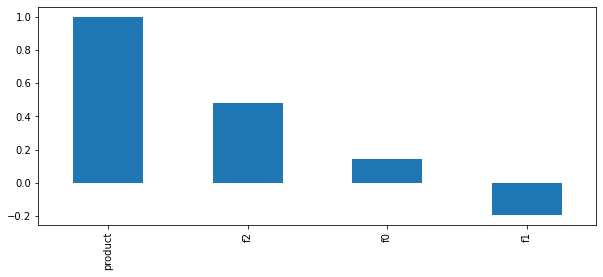

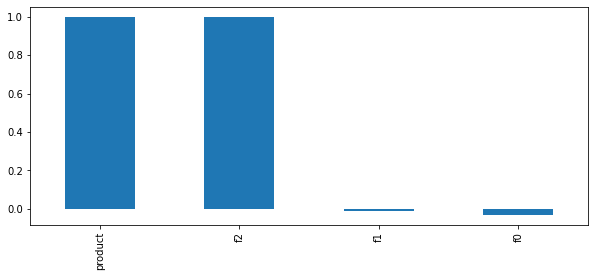

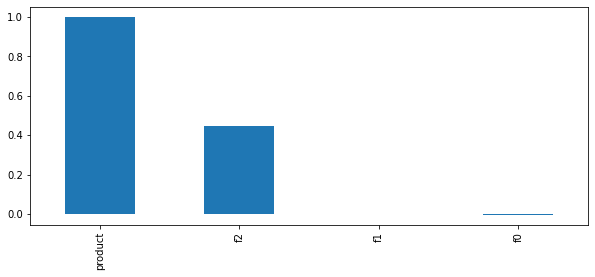

In [11]:
for df in df_all:
  plt.figure(figsize=(10,4))
  df.corr()['product'].sort_values(ascending = False).plot(kind='bar')
  plt.show()

**Kesimpulan:**
- Berdasarkan grafik balok di atas, f2 memiliki korelasi yang tinggi dengan produk, f0 memiliki korelasi yang sedikit atau rendah, f1 berkorelasi negatif dengan produk.

### Langkah 2

Melatih dan menguji model untuk setiap wilayah:
- 2.1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
- 2.2. Latih model Anda dan buatlah prediksi untuk validation set.
- 2.3. Simpan prediksi dan jawaban yang benar untuk validation set.
- 2.4. Tampilkan volume rata-rata cadangan minyak yang diprediksi dan model RMSE.
- 2.5. Analisis hasilnya.

In [12]:
def define_training_validation_sets(df):
    target = df['product']
    features = df.drop(['product'] , axis=1)

    # memisahkan dataset menjadi training (75%) dan valid test (25%)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)

    # standarisasi fitur numerik
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()

    # transform training set
    scaler.fit(features_train[numeric])
    features_train.loc[:,numeric] = scaler.transform(features_train[numeric])

    # transform validation set
    features_valid.loc[:,numeric] = scaler.transform(features_valid[numeric])

    return(target,features,features_train,features_valid,target_train,target_valid)

In [13]:
# melatih dan menguji model untuk setiap wilayah

def apply_linear_regression(features,target,features_train,target_train,features_valid,target_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    score = r2_score(target_valid,predicted_valid)
                       
    mean_target = target_valid.mean()
    mean = predicted_valid.mean()
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse**0.5
    
    return(score,mean,rmse,predicted_valid,mean_target)

In [14]:
for region in range (len(df_all)):
    df = df_all[region]

    print(print_separator)
    print("-- Wilayah", region, "--")
    target,features,features_train,features_valid,target_train,target_valid = define_training_validation_sets(df)
    
    totsize = len(df)
    print('training set  : {0:.0%}'.format(len(features_train)/totsize),features_train.shape,', training target:',target_train.shape)
    print('validation set: {0:.0%}'.format(len(features_valid)/totsize),features_valid.shape,', validation target:',target_valid.shape)
    print()

    score,mean,rmse,predicted_valid,mean_target = apply_linear_regression(features,target,features_train,target_train,features_valid,target_valid)
        
    print("Stok rata-rata bahan baku yang diprediksi:", mean)
    print("Pasokan rata-rata bahan baku aktual:", mean_target)
    print("RMSE model LinearRegression:", rmse)
    print()

********************************************************************************
-- Wilayah 0 --
training set  : 75% (75000, 3) , training target: (75000,)
validation set: 25% (25000, 3) , validation target: (25000,)

Stok rata-rata bahan baku yang diprediksi: 92.59256778438035
Pasokan rata-rata bahan baku aktual: 92.07859674082927
RMSE model LinearRegression: 37.5794217150813

********************************************************************************
-- Wilayah 1 --
training set  : 75% (75000, 3) , training target: (75000,)
validation set: 25% (25000, 3) , validation target: (25000,)

Stok rata-rata bahan baku yang diprediksi: 68.728546895446
Pasokan rata-rata bahan baku aktual: 68.72313602435997
RMSE model LinearRegression: 0.893099286775617

********************************************************************************
-- Wilayah 2 --
training set  : 75% (75000, 3) , training target: (75000,)
validation set: 25% (25000, 3) , validation target: (25000,)

Stok rata-rata bahan 

**Kesimpulan:**
- Data dipisahkan menjadi Training dan Validasi untuk setiap wilayah.
- Volume prediksi terbesar terdapat di wilayah ke-2.
- Volume cadangan rata-rata antara volume yang diprediksi dan aktual hampir sama, tetapi terdapat perbedaan dalam RMSE.
- Tingginya nilai model RMSE untuk wilayah 0 dan 2 menunjukkan perbedaan yang kuat antara hasil prediksi dan aktualnya.
- RMSE untuk wilayah 1 (0,89) menunjukkan bahwa model mengatasi prediksi dengan baik dan hasilnya hampir sama dengan aktual.

### Langkah 3

Melakukan persiapan untuk menghitung laba:
- 3.1. Simpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah.
- 3.2. Hitung volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian. Bandingkan nilai yang didapat dengan rata-rata volume cadangan minyak di setiap wilayah.
- 3.3. Sajikan temuan-temuan Anda terkait persiapan untuk perhitungan laba.

In [15]:
BUDGET_IN_MILLION = 100
REVENUE_PER_PRODUCT_UNIT = 4500
REVENUE_IN_MILLION = REVENUE_PER_PRODUCT_UNIT / 1000000

In [16]:
def revenue(target_param, predictions_param, count):    
    predictions_sorted = predictions_param.sort_values(ascending=False)
    selected = target_param[predictions_sorted.index][:count]
    return  (selected.sum() * REVENUE_IN_MILLION)

### Langkah 4

Membuat sebuah fungsi untuk menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model:
- 4.1. Pilihlah sumur dengan nilai prediksi tertinggi.
- 4.2. Rangkumlah target volume cadangan minyak berdasarkan prediksi-prediksi tersebut
- 4.3. Usulkan suatu wilayah untuk pengembangan sumur minyak dan berikan justifikasi atau alasan atas pilihan Anda. Hitunglah laba untuk volume cadangan minyak yang diperoleh.

In [17]:
def calculate_profits(target_valid,predicted_valid):
    state = np.random.RandomState(12345)
    target_valid_reindexed = target_valid.reset_index(drop=True)
    predicted_valid_reindexed  = pd.Series(predicted_valid)

    values = []
    for i in range(1000):
        target_subsample = target_valid_reindexed.sample(n=500,replace=True,random_state=state)
        predictions_subsample = predicted_valid_reindexed[target_subsample.index]
        values.append(revenue(target_subsample,predictions_subsample,200))  

    values = pd.Series(values)
    
    values = values - 100
    total_values = len(values)
    totalgainorloss = values.mean()
    
    losses = values[values < 0] 
    profits = values[values > 0] 
    nlosses = len(losses)
    nprofits = len(profits)
    
    print('STATISTIK BOOTSTRAPPING: LABA atau RUGI dalam JUTA')
    display(values.describe())
    
    profit_probability = nprofits/total_values
    loss_probability = nlosses/total_values

    loss_average = losses.sum()/nlosses
    profit_average = profits.sum()/nprofits
    
    lowerc = values.quantile(0.025) 
    upperc = values.quantile(0.975) 

    return(lowerc,upperc,totalgainorloss,profit_probability,loss_probability,loss_probability*100,profit_average,loss_average,values)

In [18]:
def update_results(df_name,score,mean,rmse,lowerc,upperc,totalgainorloss,profit_probability,loss_probability,loss_risk,profit_average,loss_average,df_results):
    result_row_str= [df_name,score,mean,rmse,lowerc,upperc,totalgainorloss,profit_probability,loss_probability,loss_risk,profit_average,loss_average]
    rows = [pd.Series(result_row_str, index=df_results.columns)]
    
    df_results = df_results.append(rows,ignore_index=True).round(decimals=2)
    return(df_results)

### Langkah 5

Menghitung risiko dan laba untuk setiap wilayah:
- 5.1. Gunakan teknik bootstrapping dengan 1.000 sampel untuk menemukan distribusi labanya.
- 5.2. Temukan keuntungan rata-rata, selang kepercayaan 95%, dan risiko kerugian. Kerugian adalah laba yang bersifat negatif, hitunglah probabilitas kerugian yang mungkin dialami dan nyatakan sebagai persentase.
- 5.3. Sajikan temuan Anda: sarankan suatu wilayah untuk pengembangan sumur minyak dan sertakan pembenaran atau alasan atas pilihan Anda.

In [19]:
df_values_all=pd.DataFrame()

i=0
for i in range(3):
    df = df_all[i]
    df_name=df_all_names[i]
    i=i+1
    
    print(print_separator)
    print("Pengolahan Dataset:", df_name)
    
    target,features,features_train,features_valid,target_train,target_valid = define_training_validation_sets(df)
    
    score,mean,rmse,predicted_valid,mean_target = apply_linear_regression(features,target,features_train,target_train,features_valid,target_valid)

    lowerc,upperc,totalgainorloss,profit_probability,loss_probability,loss_risk,profit_average,loss_average,values = calculate_profits(target_valid,predicted_valid)
        
    df_values_all = df_values_all.append(values,ignore_index=True)
    
    df_results = update_results(df_name,score,mean,rmse,lowerc,upperc,totalgainorloss,profit_probability,loss_probability,loss_risk,profit_average,loss_average,df_results)
    display(df_results)

********************************************************************************
Pengolahan Dataset: df0_oilreg0
STATISTIK BOOTSTRAPPING: LABA atau RUGI dalam JUTA


count    1000.000000
mean        4.259385
std         2.772767
min        -3.768427
25%         2.344665
50%         4.206723
75%         6.192790
max        14.098417
dtype: float64

,region,r2_score,mean,rmse,confidence_low,confidence_up,totalgainorloss,profit_probability,loss_probability,loss_risk(%),profit_average,loss_average
0,df0_oilreg0,0.28,92.59,37.58,-1.02,9.48,4.26,0.94,0.06,6.0,4.6,-1.15


********************************************************************************
Pengolahan Dataset: df1_oilreg1
STATISTIK BOOTSTRAPPING: LABA atau RUGI dalam JUTA


count    1000.000000
mean        5.152228
std         2.191824
min        -1.201163
25%         3.726463
50%         5.162191
75%         6.701637
max        13.152692
dtype: float64

,region,r2_score,mean,rmse,confidence_low,confidence_up,totalgainorloss,profit_probability,loss_probability,loss_risk(%),profit_average,loss_average
0,df0_oilreg0,0.28,92.59,37.58,-1.02,9.48,4.26,0.94,0.06,6.0,4.60,-1.15
1,df1_oilreg1,1.00,68.73,0.89,0.69,9.32,5.15,0.99,0.01,1.0,5.21,-0.49


********************************************************************************
Pengolahan Dataset: df2_oilreg2
STATISTIK BOOTSTRAPPING: LABA atau RUGI dalam JUTA


count    1000.000000
mean        4.350084
std         2.828926
min        -3.976744
25%         2.475138
50%         4.389031
75%         6.381758
max        13.904547
dtype: float64

,region,r2_score,mean,rmse,confidence_low,confidence_up,totalgainorloss,profit_probability,loss_probability,loss_risk(%),profit_average,loss_average
0,df0_oilreg0,0.28,92.59,37.58,-1.02,9.48,4.26,0.94,0.06,6.0,4.60,-1.15
1,df1_oilreg1,1.00,68.73,0.89,0.69,9.32,5.15,0.99,0.01,1.0,5.21,-0.49
2,df2_oilreg2,0.21,94.97,40.03,-1.29,9.70,4.35,0.94,0.06,6.4,4.74,-1.33


In [20]:
def display_final_results(values_all,df_results,df_all_names):

    print("HASIL AKHIR")
    f = plt.figure(figsize=(10,6))
    
    sns.distplot(values_all[0],  color="blue",kde_kws={"lw": 3},axlabel="Laba atau Rugi dalam juta",label="OILREG_0")
    sns.distplot(values_all[1],  color="red",kde_kws={"lw": 3},axlabel="Laba atau Rugi dalam juta",label="OILREG_1")
    sns.distplot(values_all[2],  color="green",kde_kws={"lw": 3},axlabel="Laba atau Rugi dalam juta", label="OILREG_2")
    plt.legend()
    plt.show()   

    display(df_results)

HASIL AKHIR


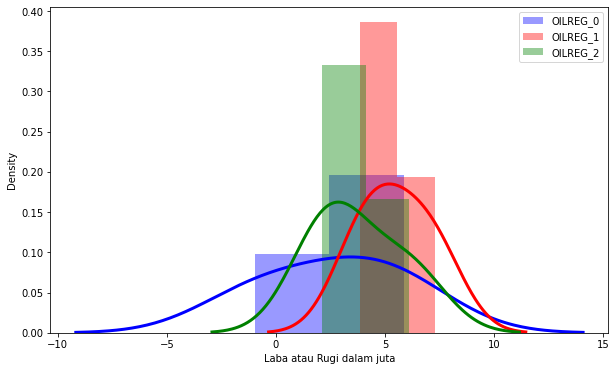

,region,r2_score,mean,rmse,confidence_low,confidence_up,totalgainorloss,profit_probability,loss_probability,loss_risk(%),profit_average,loss_average
0,df0_oilreg0,0.28,92.59,37.58,-1.02,9.48,4.26,0.94,0.06,6.0,4.60,-1.15
1,df1_oilreg1,1.00,68.73,0.89,0.69,9.32,5.15,0.99,0.01,1.0,5.21,-0.49
2,df2_oilreg2,0.21,94.97,40.03,-1.29,9.70,4.35,0.94,0.06,6.4,4.74,-1.33


In [21]:
i=0
for i in range(3):
    df = df_all[i]
    df_name=df_all_names[i]
    i=i+1

display_final_results(df_values_all, df_results, df_all_names)

### Kesimpulan Akhir

- Setelah melakukan analisa wilayah yang disarankan untuk pengembangan sumur minyak adalah dataset df1_oilreg1 yang sesuai dengan wilayah geo_data_1.csv.
- Sesuai perhitungan di atas dengan rmse, interval kepercayaan, persentase untung dan rugi:
    - Wilayah: geo_data_1.csv - R2score 1, rmse 0,89, Keuntungan maksimum antara 0,69% - 9,3% dengan confidence interval 95%, Memiliki keuntungan keseluruhan tertinggi yaitu 5.21. 
    - Kepercayaan_rendahnya adalah 0,69 dan kepercayaan_tingginya adalah 9,32. Ini menyiratkan bahwa sebagian besar pendapatan menghasilkan keuntungan. Hal ini juga terlihat dari alur distribusinya.
- Wilayah: geo_data_0.csv - Keuntungan maksimum antara -1% - 9,5% dengan confidence interval 95%
- Wilayah: geo_data_2.csv - Keuntungan maksimum antara -1,3 - 9,7% dengan confidence interval 95%
- Sesuai Analisis Data Eksplorasi, faktor f2 adalah korelasi terbesar dengan produk, korelasi f2 adalah 1 untuk geo_data_1, 0,48 untuk geo_data_0, 0,45 untuk geo_data_2. Hal ini sangat mendukung kesimpulan bahwa Wilayah 1 geo_data_1 merupakan wilayah yang ideal untuk pembangunan.
- Untuk menghindari risiko kerugian, sangat direkomendasikan wilayah: df1_oilreg1. Ini tidak menampilkan kerugian dalam confidence interval 95%.
- Wilayah df1_oilreg1 memiliki loss_risk(%) terendah sebesar 1%. Wilayah lain memiliki persentase loss_risk sebesar 6%.